Visualize historic stock prices on a chart using Matplotlib, as well as values calculated and added to the DataFrames

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
csv_file= "https://raw.githubusercontent.com/LearnPythonWithRune/PythonForFinancialAnalysis/main/AAPL.csv"

aapl=pd.read_csv(csv_file,index_col='Date',parse_dates=True)
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-09,25.327499,25.395000,25.067499,25.280001,23.513155,108806800
2016-03-10,25.352501,25.559999,25.037500,25.292500,23.524775,134054400
2016-03-11,25.559999,25.570000,25.375000,25.565001,23.778234,109632800
2016-03-14,25.477501,25.727501,25.445000,25.629999,23.838688,100304400
2016-03-15,25.990000,26.295000,25.962500,26.145000,24.317701,160270800


In [15]:
aapl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-02,128.410004,128.720001,125.010002,125.120003,125.120003,102015300
2021-03-03,124.809998,125.709999,121.839996,122.059998,122.059998,112430400
2021-03-04,121.750000,123.599998,118.620003,120.129997,120.129997,177275300
2021-03-05,120.980003,121.940002,117.570000,121.419998,121.419998,153590400
2021-03-08,120.930000,121.000000,116.209999,116.360001,116.360001,153918600


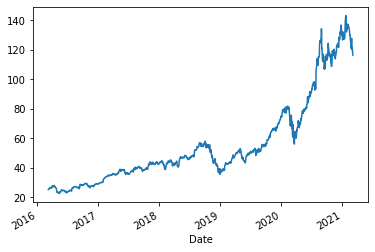

In [16]:

fig, ax = plt.subplots()
aapl['Close'].plot(ax=ax)

simple moving average

In [17]:
aapl['MA20'] = aapl['Close'].rolling(20).mean()
aapl['MA200'] = aapl['Close'].rolling(200).mean()

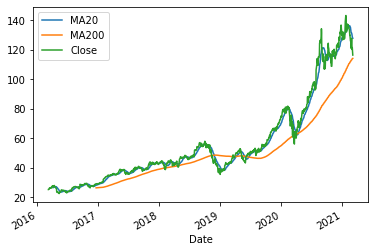

In [18]:
fig, ax = plt.subplots()
aapl[['MA20','MA200','Close']].plot(ax=ax)

If you are only interested in the historic stock prices from the beginning of 2020 and forward.

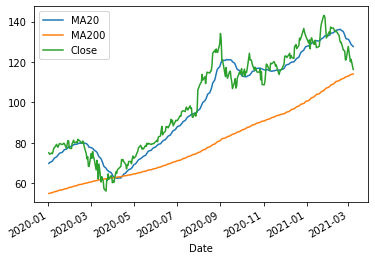

In [19]:
fig, ax = plt.subplots()
aapl[['MA20','MA200','Close']].loc['2020':].plot(ax=ax)

If you are only interested in the historic stock prices from the beginning of 2018 and forward.

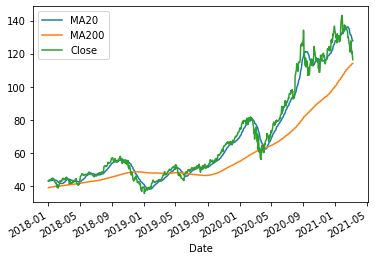

In [20]:
fig, ax = plt.subplots()
aapl[['MA20','MA200','Close']].loc['2018':].plot(ax=ax)

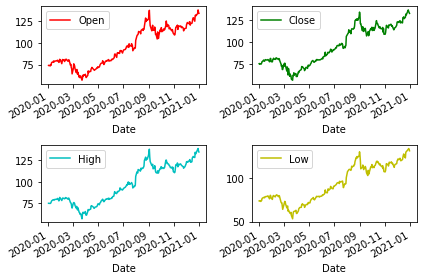

In [28]:
fig, ax = plt.subplots(2, 2)
aapl['Open'].loc['2020':].plot(ax=ax[0, 0], c='r')
aapl['Close'].loc['2020':].plot(ax=ax[0, 1], c='g')
aapl['High'].loc['2020':].plot(ax=ax[1, 0], c='c')
aapl['Low'].loc['2020':].plot(ax=ax[1, 1], c='y')
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()
plt.tight_layout()

Project – Compare two investments

In this project we will compare two investments and visualize it. We will compare an investment in TCS to an investment in INFOSYS in 2020. That is, if you invested money in TCS on the first trading day in 2020 and sold it all on the first trading day in 2021. How would that compare if you had invested it in INFOSYS instead.

In [29]:
import pandas_datareader as pdr
import datetime as dt

In [31]:
tickers = ['TCS.NS','INFY.NS']
start = dt.datetime(2020,1,1)
end = dt.datetime(2021,1,1)
data = pdr.get_data_yahoo(tickers, start, end)

In [33]:
data.head()

Attributes    Adj Close                    Close                     High  \
Symbols          TCS.NS     INFY.NS       TCS.NS     INFY.NS       TCS.NS   
Date                                                                        
2020-01-01  2100.150146  705.299194  2167.600098  736.849976  2183.899902   
2020-01-02  2090.509766  703.241211  2157.649902  734.700012  2179.949951   
2020-01-03  2132.171631  714.057434  2200.649902  746.000000  2223.000000   
2020-01-06  2131.977783  707.213562  2200.449951  738.849976  2225.949951   
2020-01-07  2137.209717  696.732422  2205.850098  727.900024  2214.649902   

Attributes                      Low                     Open              \
Symbols        INFY.NS       TCS.NS     INFY.NS       TCS.NS     INFY.NS   
Date                                                                       
2020-01-01  740.000000  2154.000000  732.549988  2168.000000  735.000000   
2020-01-02  740.799988  2149.199951  730.900024  2179.949951  738.900024   
2020-01-03  748.000000  2164.000000  733.900024  2164.000000  733.900024   
2020-01-06  753.799988  2187.899902  736.500000  2205.000000  746.099976   
2020-01-07  742.599976  2183.800049  725.099976  2200.500000  738.000000   

Attributes     Volume             
Symbols        TCS.NS    INFY.NS  
Date                              
2020-01-01  1354908.0  2112415.0  
2020-01-02  2380752.0  5658200.0  
2020-01-03  4655761.0  7882938.0  
2020-01-06  3023209.0  6519403.0  
2020-01-07  2429317.0  7899363.0

In [32]:
data.tail()

Attributes    Adj Close                     Close                      High  \
Symbols          TCS.NS      INFY.NS       TCS.NS      INFY.NS       TCS.NS   
Date                                                                          
2020-12-28  2892.624512  1216.279663  2929.399902  1240.300049  2949.699951   
2020-12-29  2893.710449  1226.086060  2930.500000  1250.300049  2952.000000   
2020-12-30  2872.776855  1222.653931  2909.300049  1246.800049  2947.699951   
2020-12-31  2826.811523  1231.479614  2862.750000  1255.800049  2905.000000   
2021-01-01  2891.489014  1236.039429  2928.250000  1260.449951  2940.000000   

Attributes                  Low                      Open               \
Symbols         INFY.NS  TCS.NS      INFY.NS       TCS.NS      INFY.NS   
Date                                                                     
2020-12-28  1248.000000  2902.0  1236.000000  2910.000000  1238.449951   
2020-12-29  1254.449951  2920.0  1235.000000  2920.000000  1235.000000   
2020-12-30  1253.300049  2902.0  1238.150024  2934.399902  1253.000000   
2020-12-31  1258.400024  2845.0  1239.000000  2900.000000  1243.000000   
2021-01-01  1265.500000  2879.0  1255.800049  2880.000000  1257.900024   

Attributes     Volume             
Symbols        TCS.NS    INFY.NS  
Date                              
2020-12-28  2108994.0  4607051.0  
2020-12-29  1994151.0  6878105.0  
2020-12-30  2637968.0  5194690.0  
2020-12-31  4040956.0  7430470.0  
2021-01-01  2681440.0  4253550.0

We will compare the investments using the Adj Close (adjusted close) price, as it includes dividend payout and other corporate adjustments

In [34]:
data = data['Adj Close']


In [35]:
data.head()

Symbols,TCS.NS,INFY.NS
Date,,
2020-01-01,2100.150146,705.299194
2020-01-02,2090.509766,703.241211
2020-01-03,2132.171631,714.057434
2020-01-06,2131.977783,707.213562
2020-01-07,2137.209717,696.732422


In [36]:
norm = data/data.iloc[0]

In [38]:
norm.head()

Symbols,TCS.NS,INFY.NS
Date,,
2020-01-01,1.000000,1.000000
2020-01-02,0.995410,0.997082
2020-01-03,1.015247,1.012418
2020-01-06,1.015155,1.002714
2020-01-07,1.017646,0.987854


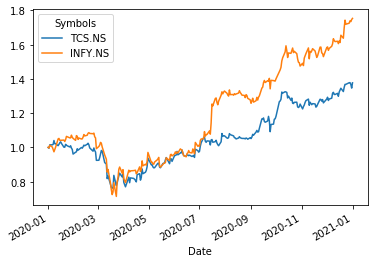

In [39]:
fig, ax = plt.subplots()
norm.plot(ax=ax)

For each Rupee invested in TCS and for each Rupee invested in Infosys, then we can see how it evolves over time.

calculate the return and visualize it.

In [41]:
TCS_Return = norm['TCS.NS'].iloc[-1]-1

In [46]:
INFY_Return = norm['INFY.NS'].iloc[-1]-1

As we have normalized data, we can get the return from the last day. We subtract 1 to get the percentage growth of the investment

In [49]:
TCS_Return 

37.68010913468218

In [48]:
INFY_Return

0.7525036731038797

In [50]:
TCS_Return *100

37.68010913468218

In [51]:
INFY_Return *100

75.25036731038797

Hence, if we invested in TCS, we would have gained 37.68% in 2020.
While, if we invested in INFOSYS, we would have gained 75.25% in 2020

Text(0.5, 1.0, 'Return on Investment')

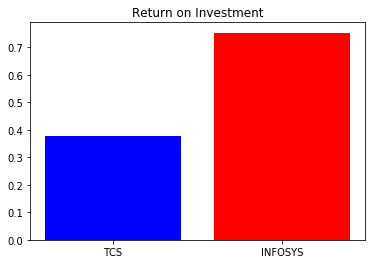

In [52]:
fig,ax = plt.subplots()
ax.bar(['TCS','INFOSYS'],[TCS_Return,INFY_Return],color=['b','r'])
ax.set_title("Return on Investment")